In [ ]:
from importlib import reload
# from imp import reload
import matplotlib.pyplot as plt
import numpy as np

from ipcv import cvlib, scanner
from config import parameters

reload(cvlib)
reload(scanner)
reload(parameters)

In [ ]:
# A function to display side-by-side visuals for comparisons.
def display(source_img, processed_img, cropped_img, ):
    # Display the previous and current side-by-side for visual comparison.
    plt.figure(figsize=(14, 12))
    plt.subplot(1, 3, 1)
    plt.imshow(source_img, cmap='gray')
    plt.title('Source Image')

    plt.subplot(1, 3, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title('Processed Image')

    if cropped_img is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(cropped_img, cmap='gray')
        plt.title('Cropped Image')

In [ ]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode101.png')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_wide_and_high1)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode102.png')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_wide_and_high1)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode111.png')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_wide_and_high2)
image = cvlib.adjust_gamma(cvlib.convert_rgb2gray(image),0.9)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode112.png')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_wide_and_high2)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode113.png')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_wide_and_high2)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode120.jpg')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_narrow_and_high1)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

In [ ]:
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode140.jpg')
cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_wide_and_high2)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

Info                : size=2,034,988, RxC=[1,324x1,537], box-ratio-on: False, attempt-limit: 10
----------> [BEGIN, attempt=1]
[1] --Pixel-check   : [black=92.57%, white=7.43%] within 100% limit.
[1] --Morphing      : dilation:erosion=[2:1]
[1] --Contour       : found=34; min-req-area=81,399.52 (0.04 at rate); area should be > 4.00%
----------> [BEGIN, attempt=2]
[2] --Pixel-check   : [black=92.91%, white=7.09%] within 100% limit.
[2] --Morphing      : dilation:erosion=[2:1]
[2] --Contour       : found=30; min-req-area=81,399.52 (0.04 at rate); area should be > 4.00%
[c:4] --Contour     : selected max-area=98,675.00 at rate=4.85%
----------> [END, attempt=2/10]

Decoded barcode : 9780718011932


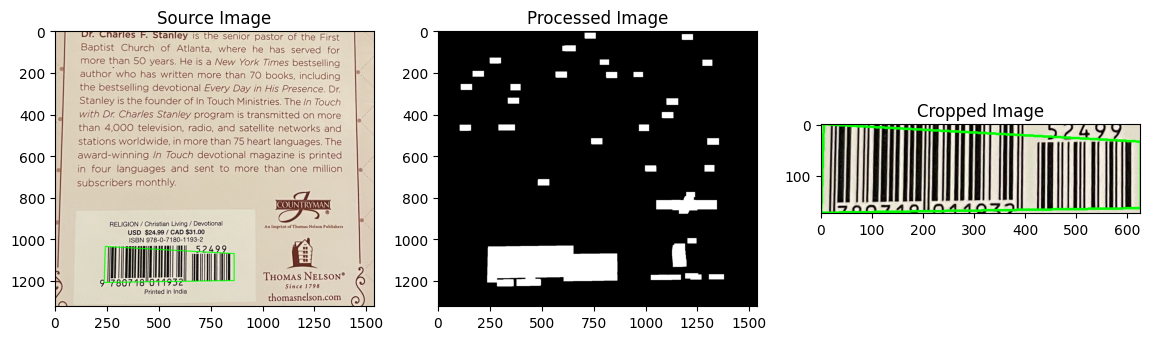

In [355]:
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode150.jpg')
# cropped, processed = scanner.detect_barcode_v2(image, **parameters.barcode_ps_charles)
cropped, processed = scanner.detect_barcode_v3(image, **parameters.barcode_general2)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')

Info                : size=12,192,768, RxC=[4,032x3,024], box-ratio-on: False, attempt-limit: 100
----------> [BEGIN, attempt=1]
[1] --Pixel-check   : [black=39.30%, white=60.70%] within 100% limit.
[1] --Morphing      : dilation:erosion=[2:1]
[1] --Contour       : found=1; min-req-area=12,192.77 (0.001 at rate); area should be > 0.10%
----------> [BEGIN, attempt=2]
[2] --Pixel-check   : [black=43.56%, white=56.44%] within 100% limit.
[2] --Morphing      : dilation:erosion=[2:1]
[2] --Contour       : found=1; min-req-area=12,192.77 (0.001 at rate); area should be > 0.10%
----------> [BEGIN, attempt=3]
[3] --Pixel-check   : [black=43.37%, white=56.63%] within 100% limit.
[3] --Morphing      : dilation:erosion=[2:1]
[3] --Contour       : found=1; min-req-area=12,192.77 (0.001 at rate); area should be > 0.10%
----------> [BEGIN, attempt=4]
[4] --Pixel-check   : [black=43.18%, white=56.82%] within 100% limit.
[4] --Morphing      : dilation:erosion=[2:1]
[4] --Contour       : found=1; min-r

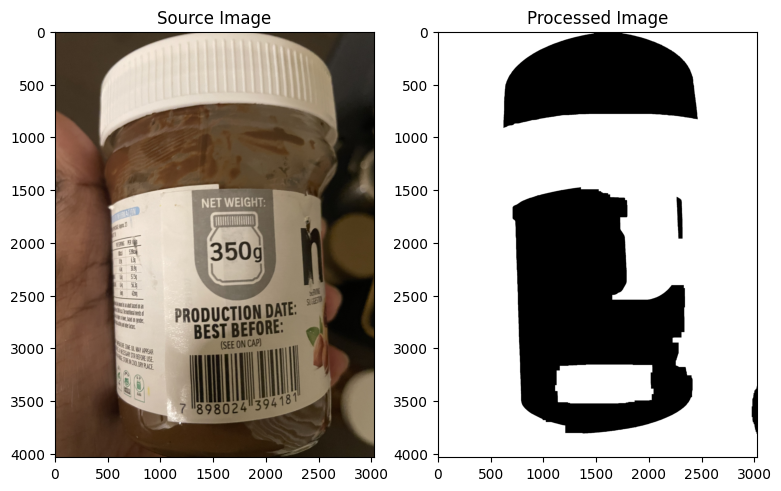

In [395]:
reload(cvlib)
reload(scanner)
reload(parameters)
image = cvlib.load_image('resources/barcode/barcode160.jpg')
cropped, processed = scanner.detect_barcode_v3(image, **parameters.barcode_general1)
display(image, processed, cropped)
if cropped is not None:
    print(f'Decoded barcode : {scanner.decode_barcode(cropped)}')